In [95]:
# Importing required packages
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso,LinearRegression,LogisticRegression,RidgeCV,LassoCV,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#### Loading the Algerian Forest Fire Dataset 

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


### Data Cleaning

In [3]:
# Stripping the column names
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [4]:
# checking rows for null values
df[df['RH'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.iloc[122:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


In [6]:
df.shape

(246, 14)

In [7]:
# droping irrelevant rows
df.drop(index=[122,123],inplace=True)
df.reset_index(drop=True,inplace=True)

In [8]:
# Creating a new column called region reprenting [0:- Bejaia and 1- Sidi Bel-abbes]
df.loc[:122,"region"]=0
df.loc[122:,"region"]=1

In [9]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [10]:
df.shape

(244, 15)

In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [13]:
# checking unique values
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            127
Classes          8
region           2
dtype: int64

In [14]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [15]:
# removing extra spaces
df['Classes'] = df['Classes'].str.strip()

In [16]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

### Understanding the dataset

In [17]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 28.7+ KB


In [20]:
df[df['DC'].apply(lambda x: pd.to_numeric(x,errors='coerce')).isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [22]:
# Checking str value in integer column
for col in df.columns:
    if col not in ['Classes', 'region']:
        mask = df[col].apply(lambda x: pd.to_numeric(x,errors='coerce')).isna()
        if mask.any():
            print(f'Column is {col}')
            print(df[mask])
            print('---------------------------------------')

Column is DC
    day month  year Temperature  RH  Ws Rain  FFMC   DMC      DC   ISI   BUI  \
165  14    07  2012          37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes  region  
165  fire        NaN     1.0  
---------------------------------------
Column is FWI
    day month  year Temperature  RH  Ws Rain  FFMC   DMC      DC   ISI   BUI  \
165  14    07  2012          37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

         FWI Classes  region  
165  fire        NaN     1.0  
---------------------------------------


In [23]:
# Droping the rows 
df.drop(index=165,inplace=True)

In [24]:
df.shape

(243, 15)

In [25]:
df[df['DC'].map(type)=='O']

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region


In [26]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [27]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [28]:
# Changing the data types for numerical columns
int_col = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws']
float_col = ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']
for col in df.columns:
    if col in int_col:
        df[col] = df[col].astype(int)
    elif col in float_col:
        df[col] = df[col].astype(float)

In [29]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
region         float64
dtype: object

In [30]:
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243,243.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137,NaN
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,NaN,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,NaN,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,NaN,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,NaN,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,NaN,1.000000


In [31]:
# Checking null
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [32]:
# dropping year as it has only one value i.e. 2012
df.drop(columns='year',inplace=True)

In [33]:
numerical_columns = [col for col in df.columns if df[col].dtypes != 'O']
numerical_columns

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region']

## Analysis

In [34]:
# Checking Correlation
df[numerical_columns].corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
day,1.000000,-0.000369,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,0.000821
month,-0.000369,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.001857
Temperature,0.097227,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.269555
RH,-0.076034,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.402682
Ws,0.047812,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.181160
Rain,-0.112523,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.040013
FFMC,0.224956,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.222241
DMC,0.491514,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.192089
DC,0.527952,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.078734
ISI,0.180543,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.263197


<Axes: >

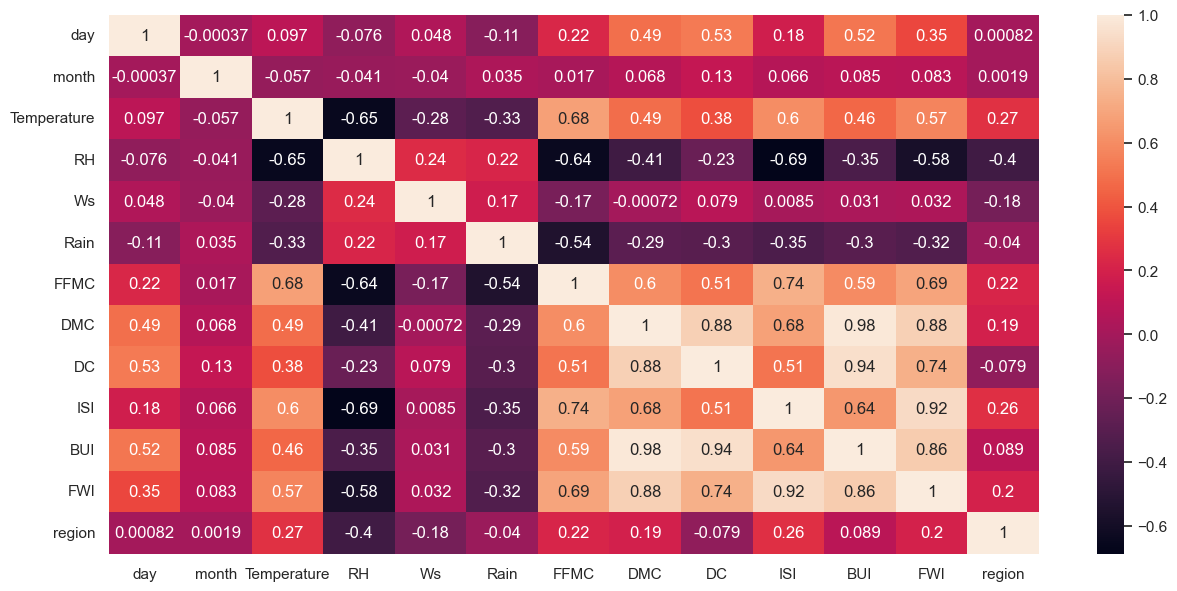

In [35]:
plt.figure(figsize=(15,7))
sns.heatmap(df[numerical_columns].corr(),annot=True)

Report:-

    1. RH is negatively corelated with Temperature, FFMC and ISI
    2. Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

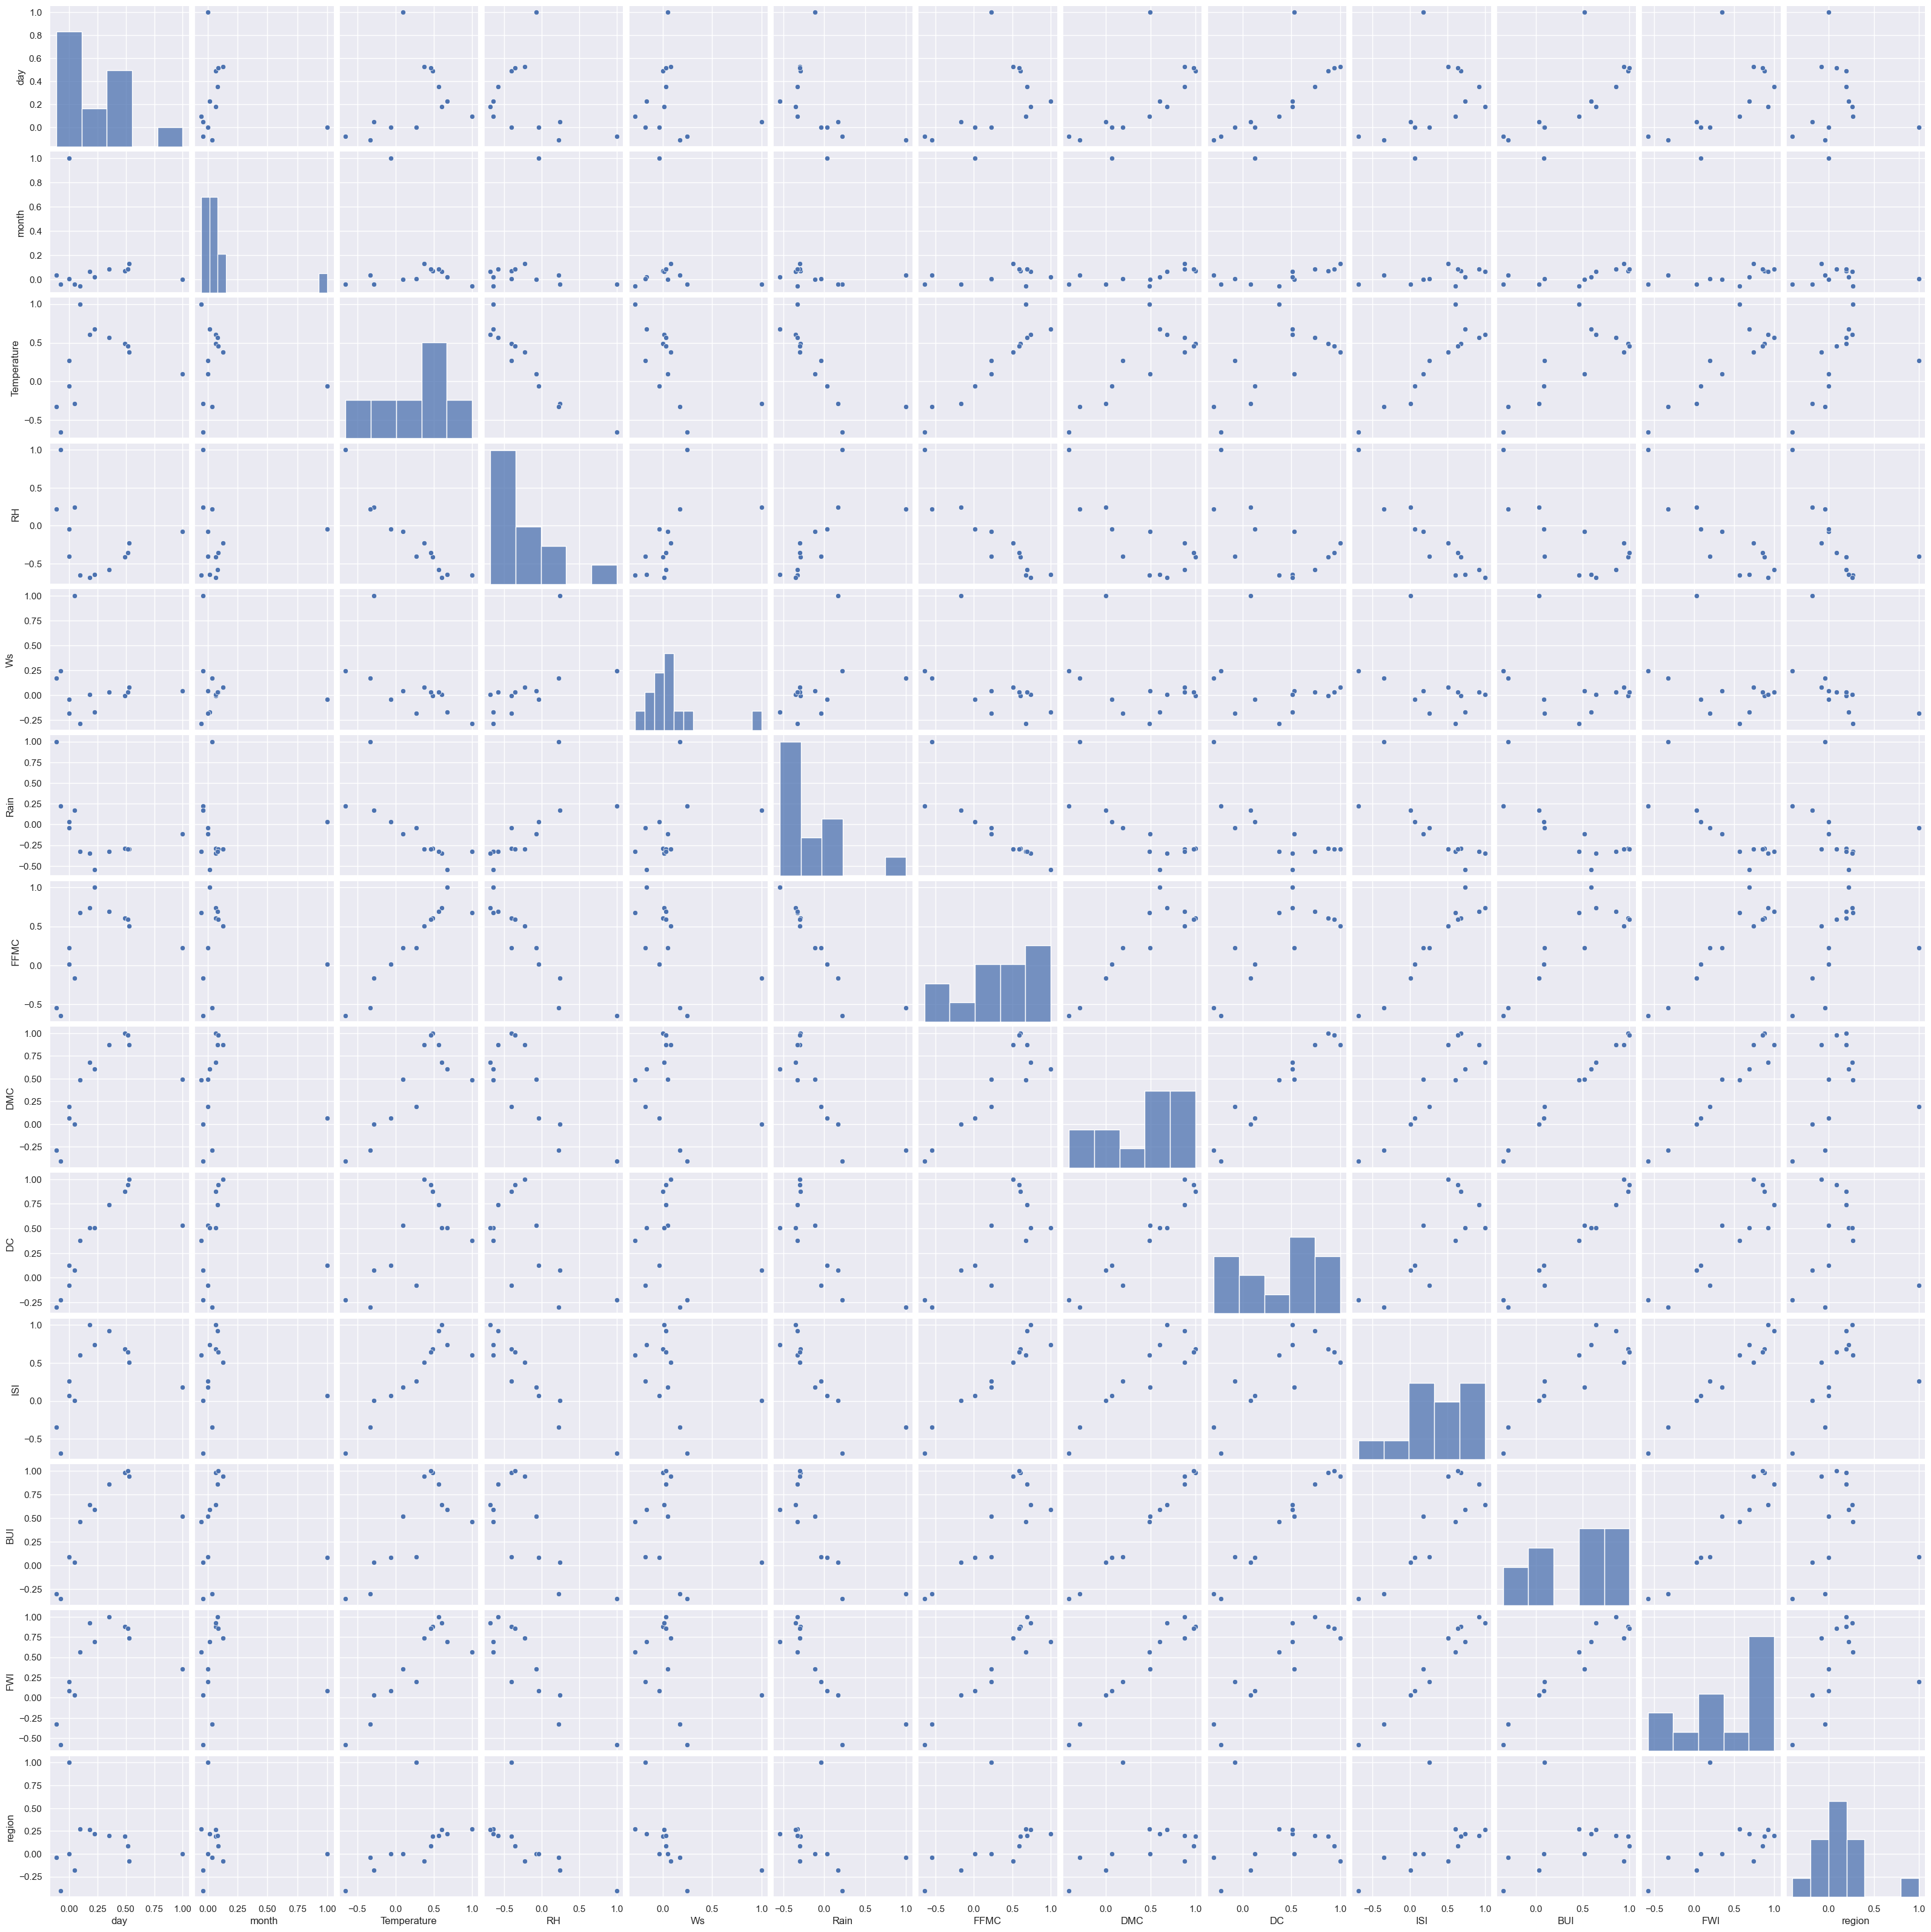

In [36]:
# Multivariate analysis
sns.pairplot(df[numerical_columns].corr())

<Axes: xlabel='Temperature', ylabel='Density'>

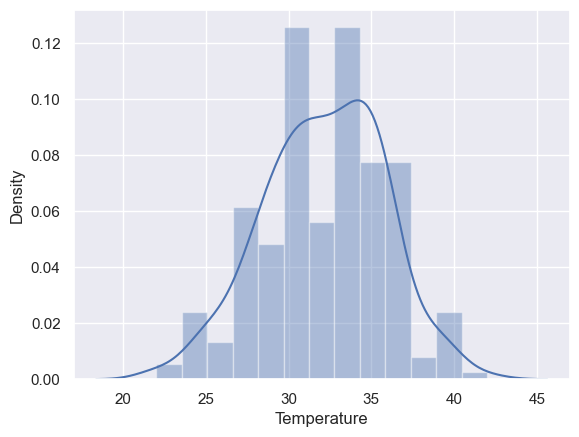

In [37]:
sns.distplot(df['Temperature'])

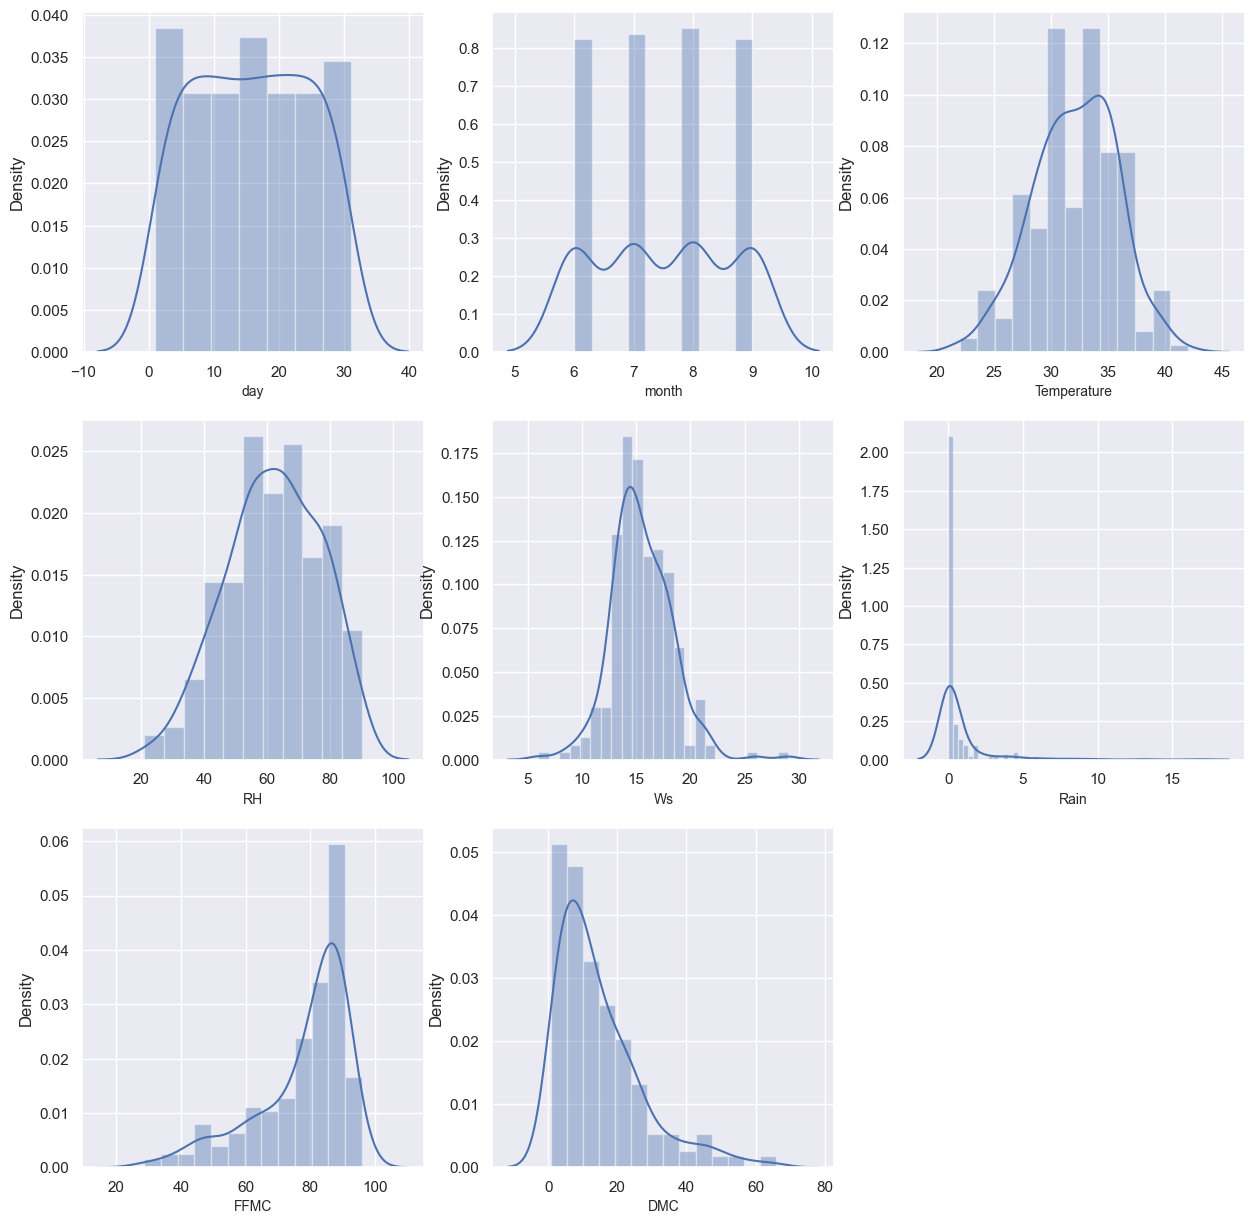

In [38]:
plt.figure(figsize=(15,15),facecolor='white')
cnt = 1 # since 9 columns
for i in range(0,len(numerical_columns)):
    cnt+=1
    if cnt <=9:
        ax = plt.subplot(3,3,i+1)
        sns.distplot(df[numerical_columns[i]])
        plt.xlabel(numerical_columns[i],fontsize=10)
plt.show()

In [39]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose, Insulin, skin thickness, BMI and Blood Pressure which have value as 0. That's not possible. You can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

<Axes: >

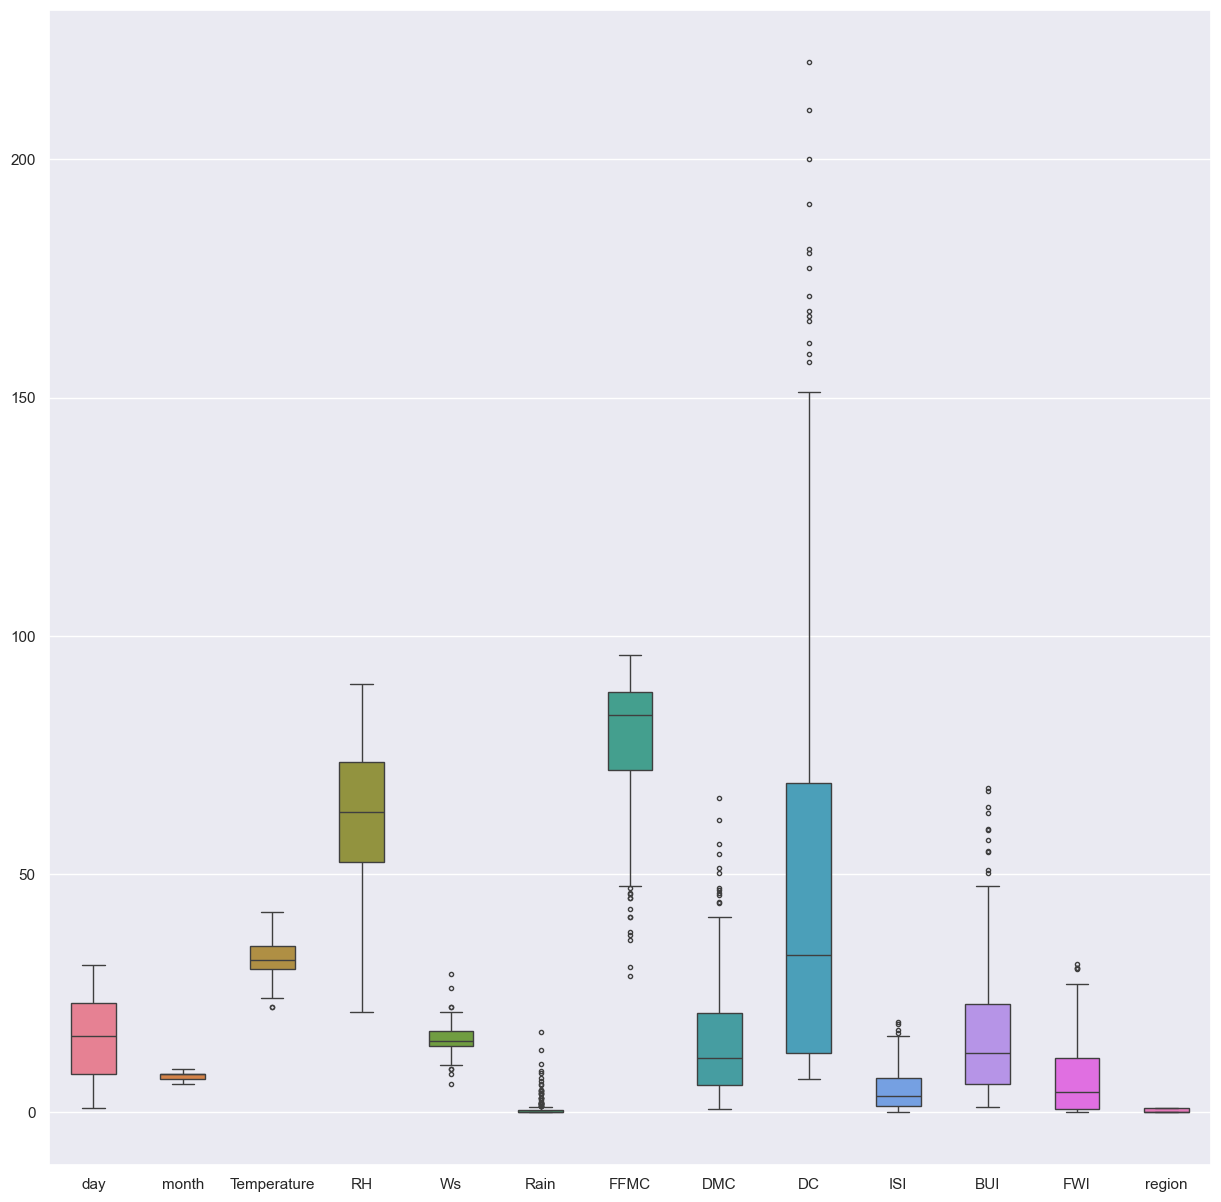

In [41]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=df[numerical_columns],ax=ax,width=0.5,fliersize=3)

### Handling outliers

In [42]:
df['Ws'].quantile(0.98)

21.0

In [43]:
print('Ws min: ',min(df['Ws']),'max: ',max(df['Ws']))

Ws min:  6 max:  29


In [44]:
q = df['Ws'].quantile(0.98)

In [45]:
# we are removing the top 2% data
data_cleaned = df[df["Ws"] < q]

In [46]:
q = df['Rain'].quantile(0.97)
# we are removing the top 3% data
data_cleaned = df[df["Rain"] < q]

In [47]:
q = df['DMC'].quantile(0.97)
# we are removing the top 3% data
data_cleaned = df[df["DMC"] < q]

In [48]:
q = df['DC'].quantile(0.97)
# we are removing the top 3% data
data_cleaned = df[df["DC"] < q]

In [49]:
q = df['ISI'].quantile(0.98)
# we are removing the top 2% data
data_cleaned = df[df["ISI"] < q]

In [50]:
q = df['BUI'].quantile(0.98)
# we are removing the top 2% data
data_cleaned = df[df["BUI"] < q]

In [51]:
q = df['FWI'].quantile(0.98)
# we are removing the top 2% data
data_cleaned = df[df["FWI"] < q]

In [52]:
data_cleaned

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [53]:
print('FWI min: ',min(df['FWI']),'max: ',max(df['FWI']))

FWI min:  0.0 max:  31.1


In [54]:
print('FWI min: ',min(data_cleaned['FWI']),'max: ',max(data_cleaned['FWI']))

FWI min:  0.0 max:  26.3


In [55]:
data_cleaned['FWI'].sort_values()

16      0.0
106     0.0
3       0.0
240     0.0
93      0.0
       ... 
199    24.0
205    24.5
173    25.4
209    26.1
200    26.3
Name: FWI, Length: 238, dtype: float64

In [56]:
df.shape

(243, 14)

In [57]:
data_cleaned.shape

(238, 14)

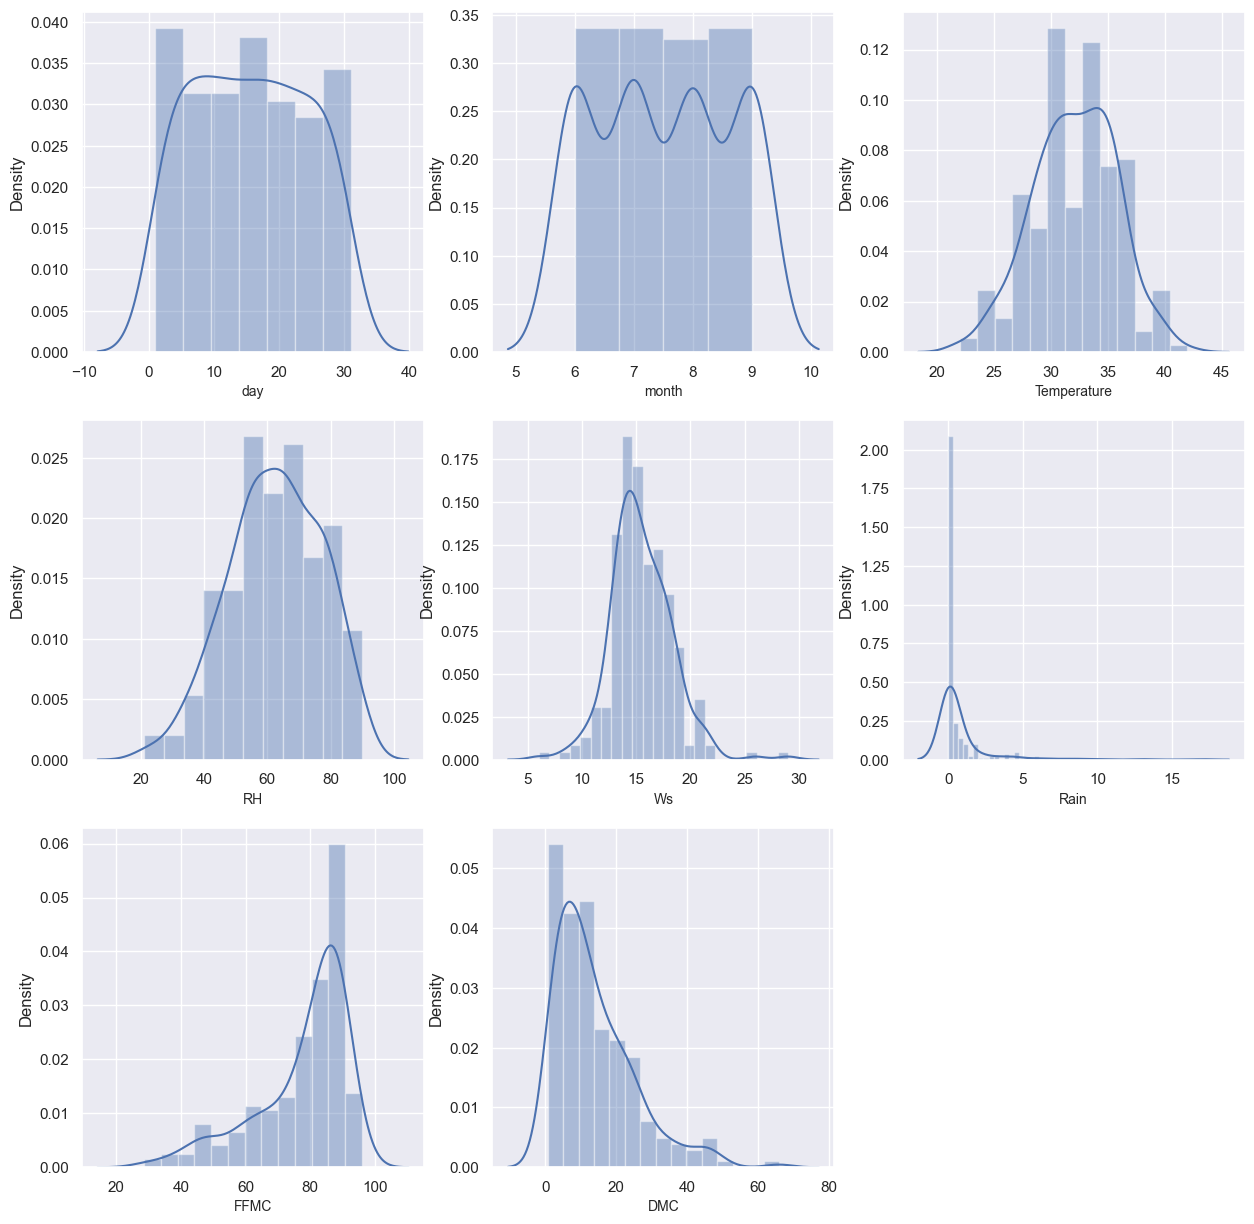

In [58]:
plt.figure(figsize=(15,15),facecolor='white')
cnt = 1 # since 9 columns
for i in range(0,len(numerical_columns)):
    cnt+=1
    if cnt <=9:
        ax = plt.subplot(3,3,i+1)
        sns.distplot(data_cleaned[numerical_columns[i]])
        plt.xlabel(numerical_columns[i],fontsize=10)
plt.show()

The data looks much better now than before. We will start our analysis with this data now as we don't want to lose important information. If our model doesn't work with accuracy, we will come back for more preprocessing.

<Axes: >

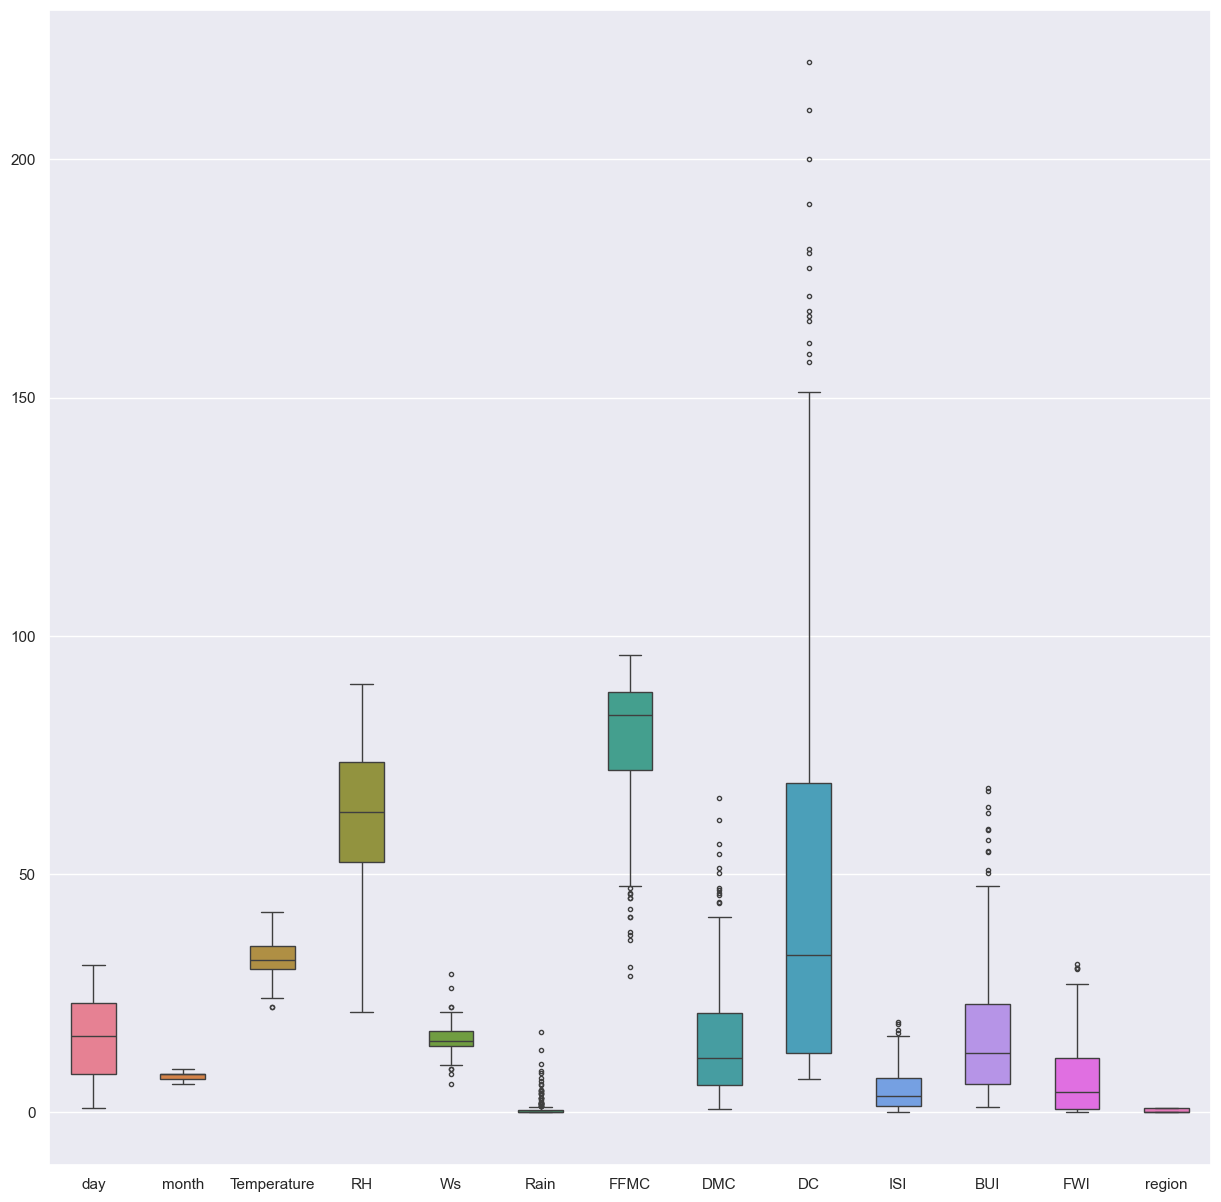

In [59]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=df[numerical_columns],ax=ax,width=0.5,fliersize=3)

In [60]:
data_cleaned.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


# Exploratory Data Analysis

Encoding not fire as 1 and Fire as 0

In [61]:
set(data_cleaned['Classes'])

{'fire', 'not fire'}

In [63]:
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Classes
data_cleaned['Classes'] = label_encoder.fit_transform(data_cleaned['Classes'],)
data_cleaned.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0.0


In [65]:
set(data_cleaned.Classes)

{0, 1}

In [66]:
data_cleaned.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,1.000000,-0.008054,0.084658,-0.045112,0.036479,-0.105607,0.208344,0.478508,0.511571,0.143491,0.503764,0.320141,-0.187343,-0.008939
month,-0.008054,1.000000,-0.059614,-0.035720,-0.041883,0.037103,0.012058,0.052618,0.115762,0.060453,0.071357,0.073353,-0.019252,-0.000063
Temperature,0.084658,-0.059614,1.000000,-0.650483,-0.296124,-0.323385,0.673151,0.501977,0.372541,0.608977,0.468650,0.587520,-0.510541,0.266155
RH,-0.045112,-0.035720,-0.650483,1.000000,0.270868,0.216129,-0.635705,-0.356356,-0.176171,-0.664172,-0.299571,-0.549948,0.418062,-0.392425
Ws,0.036479,-0.041883,-0.296124,0.270868,1.000000,0.176988,-0.180545,-0.037863,0.058225,-0.021078,0.000153,-0.003902,0.080957,-0.187962
Rain,-0.105607,0.037103,-0.323385,0.216129,0.176988,1.000000,-0.542458,-0.296599,-0.299423,-0.350402,-0.306331,-0.335138,0.375681,-0.035596
FFMC,0.208344,0.012058,0.673151,-0.635705,-0.180545,-0.542458,1.000000,0.611958,0.498863,0.742917,0.595416,0.707359,-0.765344,0.212929
DMC,0.478508,0.052618,0.501977,-0.356356,-0.037863,-0.296599,0.611958,1.000000,0.867046,0.643195,0.979933,0.849091,-0.597878,0.174816
DC,0.511571,0.115762,0.372541,-0.176171,0.058225,-0.299423,0.498863,0.867046,1.000000,0.467368,0.938634,0.710591,-0.505706,-0.102884
ISI,0.143491,0.060453,0.608977,-0.664172,-0.021078,-0.350402,0.742917,0.643195,0.467368,1.000000,0.604796,0.920956,-0.742657,0.248281


#### Percentage for Pie Chart

In [73]:
percentage = df['Classes'].value_counts(normalize=True) * 100
percentage

Classes
fire        56.378601
not fire    43.621399
Name: proportion, dtype: float64

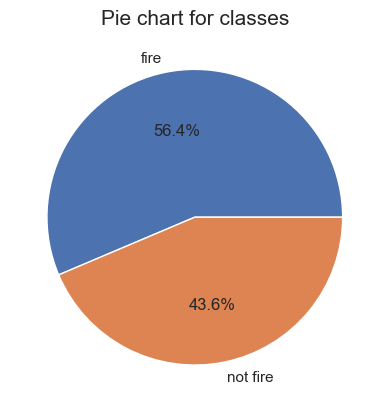

In [82]:
plt.pie(percentage,autopct="%1.1f%%",labels=percentage.index)
plt.title('Pie chart for classes',fontsize=15)
plt.show()

### Model Building Using Logistic Regression

In [68]:
x = data_cleaned.drop(columns='Classes')
y = data_cleaned['Classes']

In [83]:
x

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1.0
241,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0
242,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0


In [84]:
y

0      1
1      1
2      1
3      1
4      1
      ..
239    0
240    1
241    1
242    1
243    1
Name: Classes, Length: 238, dtype: int32

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=32,test_size=0.33)

### Feature Scaling

In [90]:
len(x.columns)

13

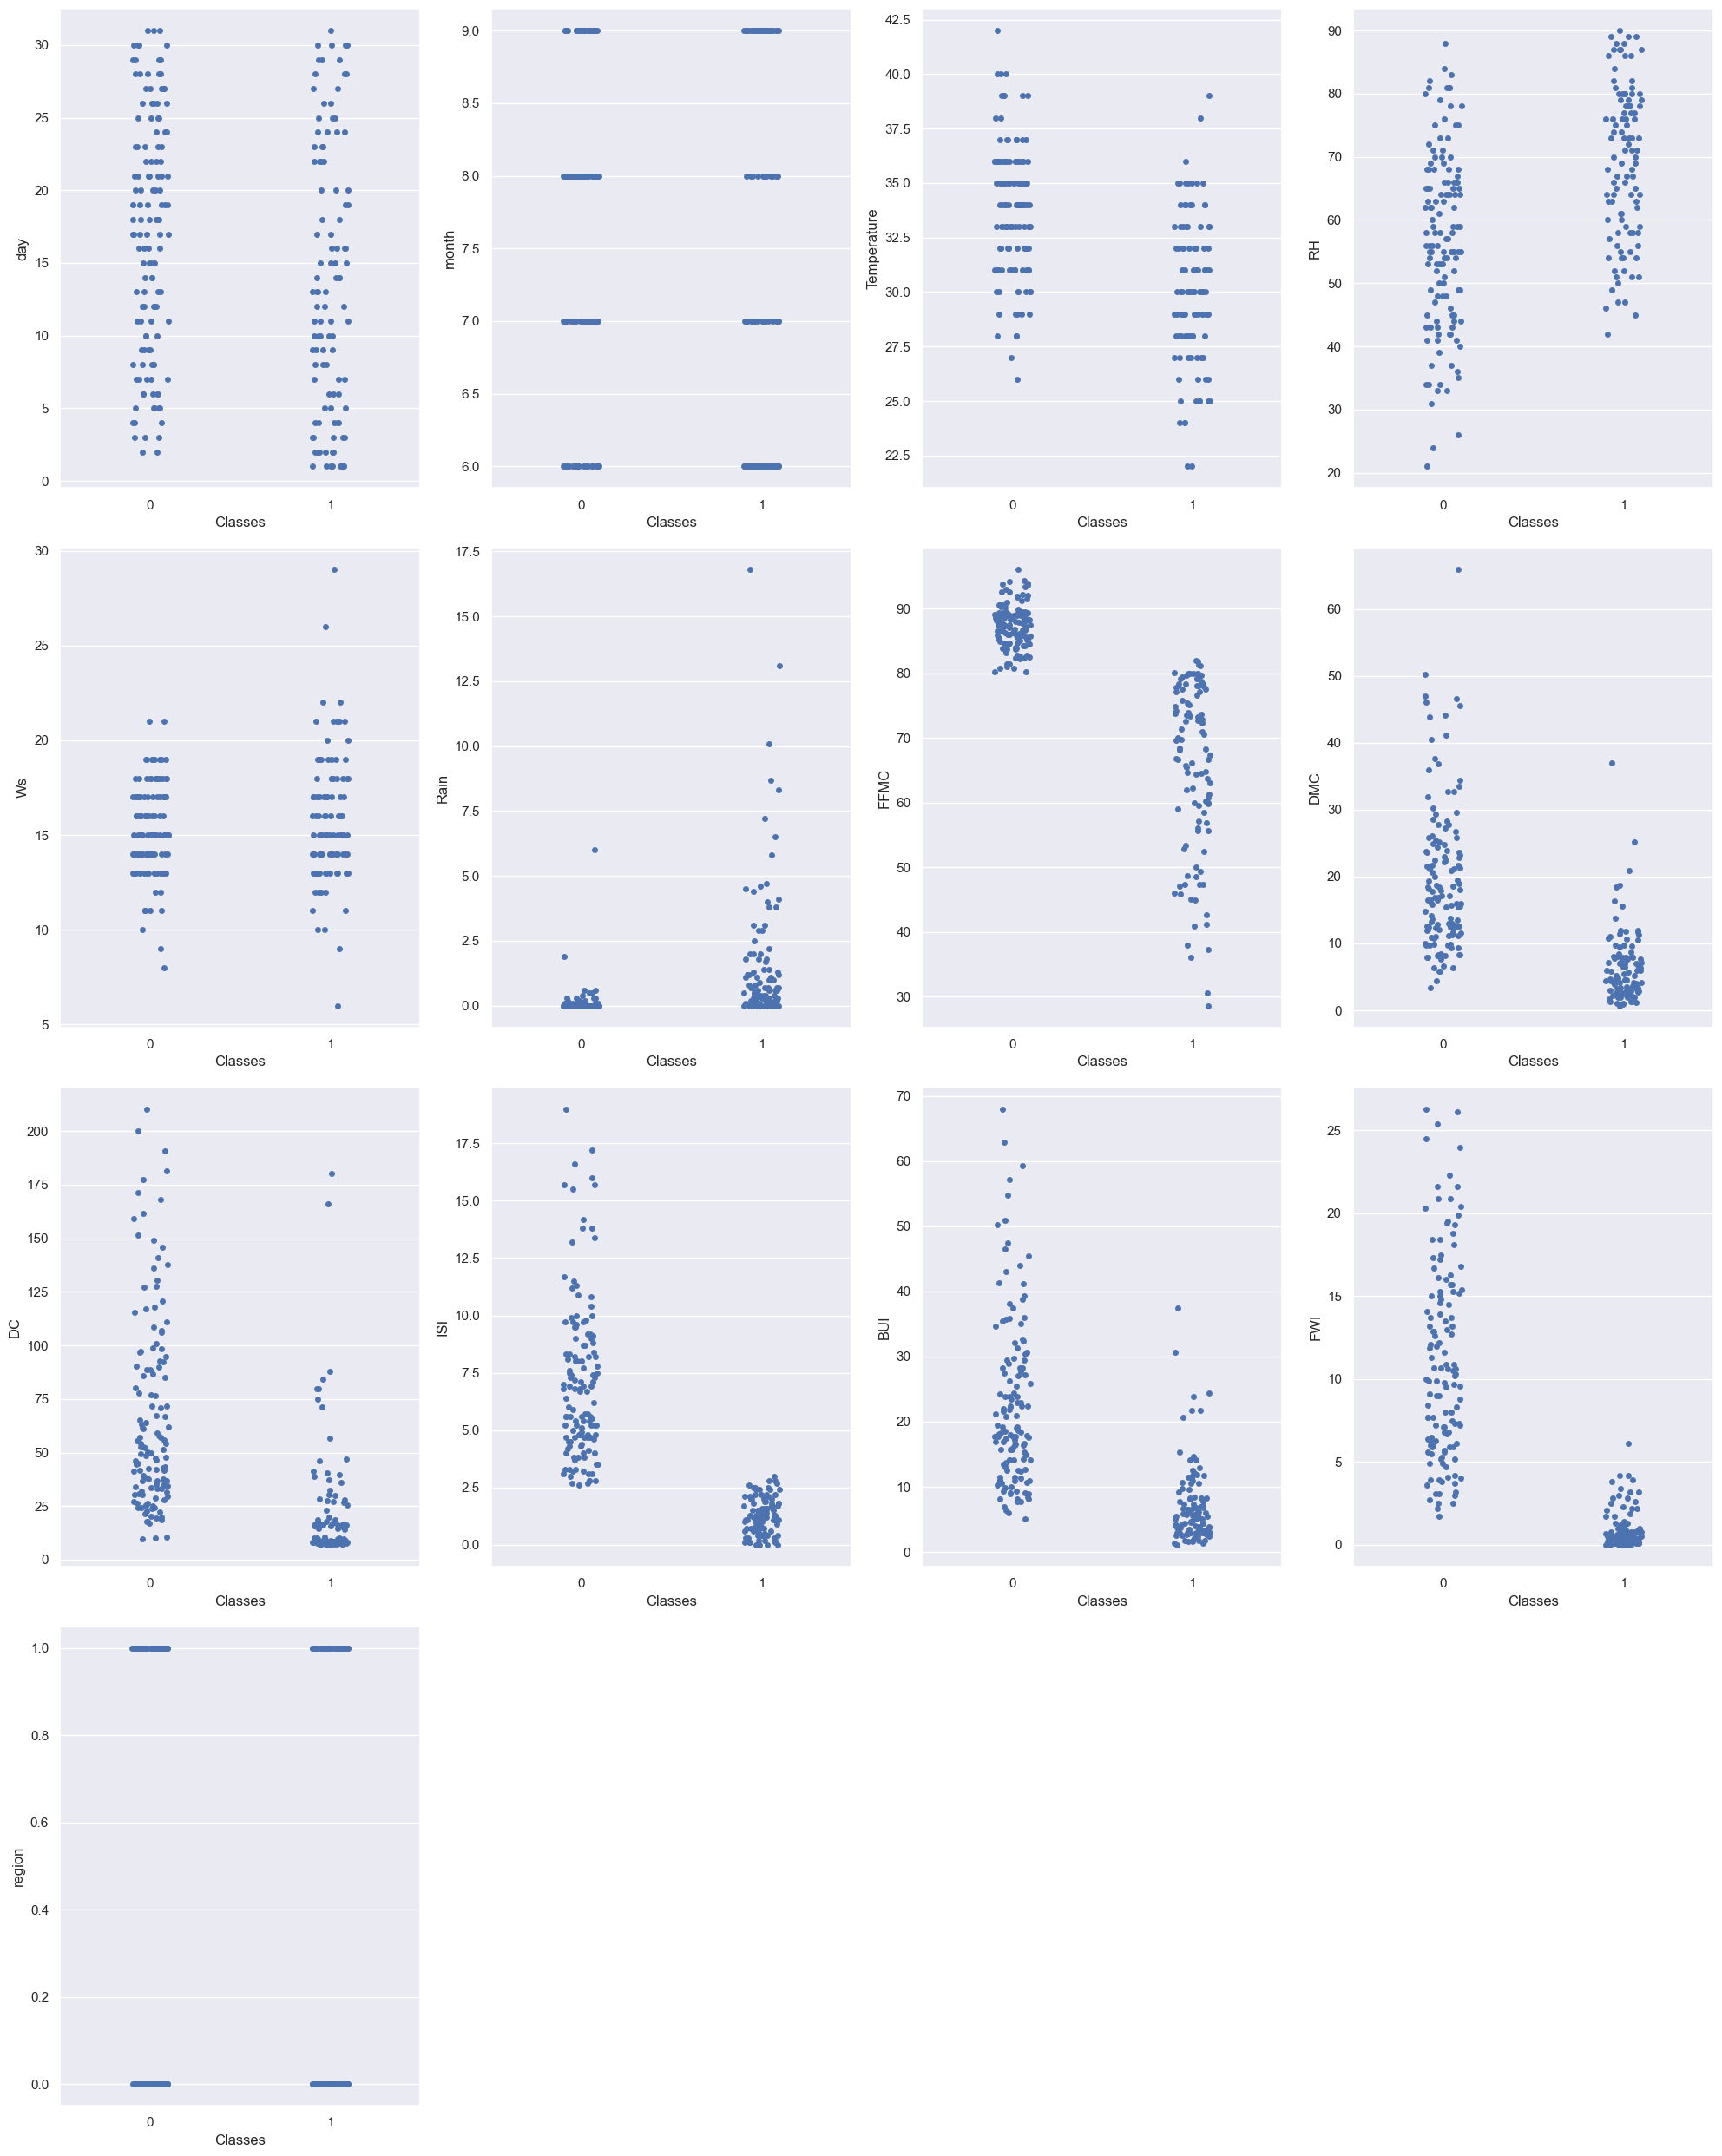

In [92]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=13 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(x = y,y = x[column])
    plotnumber+=1
plt.tight_layout()

In [93]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.65439286, -1.33341751, -0.85239633, ..., -0.95738786,
        -0.90095943, -0.98333217],
       [-1.54082334, -1.33341751, -0.85239633, ..., -0.91891518,
        -0.9158286 , -0.98333217],
       [-1.42725383, -1.33341751, -1.67707246, ..., -1.01124962,
        -0.96043612, -0.98333217],
       ...,
       [ 1.41198398,  1.34090862, -1.40218042, ..., -0.95738786,
        -0.94556695,  1.01695036],
       [ 1.52555349,  1.34090862, -2.22685655, ..., -0.82658074,
        -0.87122108,  1.01695036],
       [ 1.63912301,  1.34090862, -2.22685655, ..., -0.84966435,
        -0.90095943,  1.01695036]])

In [100]:
x_scaled.shape

(238, 13)

In [102]:
# Multicollinearity 
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,1.469750,day
1,1.089683,month
2,2.458024,Temperature
3,2.802102,RH
4,1.308444,Ws
5,1.553094,Rain
6,4.092731,FFMC
7,69.701636,DMC
8,22.663703,DC
9,21.737276,ISI


In [103]:
# check once later

All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [105]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [106]:
# model saving or pickling our model - 
import pickle
# Writing different model files to file
with open( 'modelForPrediction.pkl', 'wb') as f:
    pickle.dump(log_reg,f)

### Let's see how well our model performs on the test data set.

In [109]:
y_pred = log_reg.predict(x_test)

#### Accuracy

In [110]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9620253164556962

Our Model has an accuracy of 96%

#### Confusion matrix

In [113]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[43,  1],
       [ 2, 33]], dtype=int64)

In [114]:
conf_mat[0][1]

1

In [116]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [117]:
# Breaking down formula for accuracy
(true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)

0.9620253164556962

In [118]:
## Precision

In [119]:
precision = true_positive / (true_positive + false_positive)
precision

0.9772727272727273

In [120]:
## Recall

In [121]:
recall = true_positive / (true_positive + false_negative)
recall

0.9555555555555556

In [122]:
## F1-Score
f1_score = (2 * precision * recall) / (precision + recall)
f1_score

0.9662921348314608